In [2]:
from src.solver import Solver0D
from src.solver_results import SolverResults
from src.misc import d2m, get_basename, get_solver_path
import matplotlib.pyplot as plt
import numpy as np
import argparse
from src.run_sim import get_branch_results_file

In [3]:
def combine_solver_results_sten(solver: Solver0D, solver_results: dict, out_file, ylim = None):
    # retrieve time of cardiac cycle and number of points per cycle
    inflow_tc = solver.inflow.tc
    num_pts = int(solver.simulation_params['number_of_time_pts_per_cardiac_cycle'])
        
    ## save flow and pressure graphs (last 3 cycles)
    fig, ax = plt.subplots(1,1 ,figsize=(15, 10))
    ax.set_title(f"Inlet Pressure", fontdict={'fontsize': 24})
    ax.set_xlabel('time (s)', fontdict={'fontsize': 20})
    ax.set_ylabel('pressure (mmHg)', fontdict={'fontsize': 20})
    # plot last 3 cycles
    last_three_cycles = -3 *  num_pts
    
    for name, sim_results in solver_results.items():
        v0 = sim_results.vessel_df('V0')
        inlet_pressure = d2m(np.array(v0['pressure_in'][last_three_cycles:]))
        time_ltc = np.array(v0['time'][last_three_cycles:])
        # plot pressure curves
        ax.plot(time_ltc, inlet_pressure, label = name)
        # get last cardiac cycle
        v0_lc = SolverResults.only_last_cycle(v0, tc = inflow_tc)
        
    ax.tick_params(axis="x", labelsize=16) 
    ax.tick_params(axis = 'y', labelsize=16)
    if ylim:
        ax.set_ylim(ylim)
    ax.legend(fontsize = 24, loc = 'upper left', framealpha = .5)

    fig.savefig(out_file)

In [4]:
def get_avg(t, y):
    return np.trapz(y, t) / (t[-1] - t[0])

In [16]:
def combine_solver_results_as(solver: Solver0D, solver_results: dict, out_file, ylim = None):
    # retrieve time of cardiac cycle and number of points per cycle
    inflow_tc = solver.inflow.tc
    num_pts = int(solver.simulation_params['number_of_time_pts_per_cardiac_cycle'])
        
    ## save flow and pressure graphs (last 3 cycles)
    fig, ax = plt.subplots(1,1 ,figsize=(15, 10))
    ax.set_title(f"Inlet Pressure", fontdict={'fontsize': 24})
    ax.set_xlabel('time (s)', fontdict={'fontsize': 20})
    ax.set_ylabel('pressure (mmHg)', fontdict={'fontsize': 20})
    # plot last 3 cycles
    last_three_cycles = -3 *  num_pts
    
    healthy = solver_results['healthy']
    
    def get_pap(rez):
        v0 = rez.vessel_df('V0')
        v0_lc = SolverResults.only_last_cycle(v0, tc = inflow_tc)
        time_lc = np.array(v0_lc['time'])
        inlet_pressure = d2m(np.array(v0_lc['pressure_in']))
        return get_avg(time_lc, inlet_pressure), inlet_pressure.max()

    healthy_mpap, sys_pap= get_pap(healthy)
    
    # 
    for name, sim_results in solver_results.items():
        print(name)
        v0 = sim_results.vessel_df('V0')
        inlet_pressure = d2m(np.array(v0['pressure_in'][last_three_cycles:]))
        time_ltc = np.array(v0['time'][last_three_cycles:])
        
        tmp_mpap, tmp_sys = get_pap(sim_results)
        
        # plot pressure curves
        ax.plot(time_ltc, inlet_pressure, label = f'{name}: {round(((tmp_sys/sys_pap - 1) * 100), 2)}/{round((tmp_mpap/healthy_mpap - 1) * 100, 1)} %')

    
        
        
    ax.tick_params(axis="x", labelsize=16) 
    ax.tick_params(axis = 'y', labelsize=16)
    if ylim:
        ax.set_ylim(ylim)
    lg = ax.legend(fontsize = 24, loc = 'upper left', framealpha = .5, title = 'sysPAP/mPAP change')
    title = lg.get_title()
    title.set_fontsize(24)

    fig.savefig(out_file)

healthy
SU0238
proximal


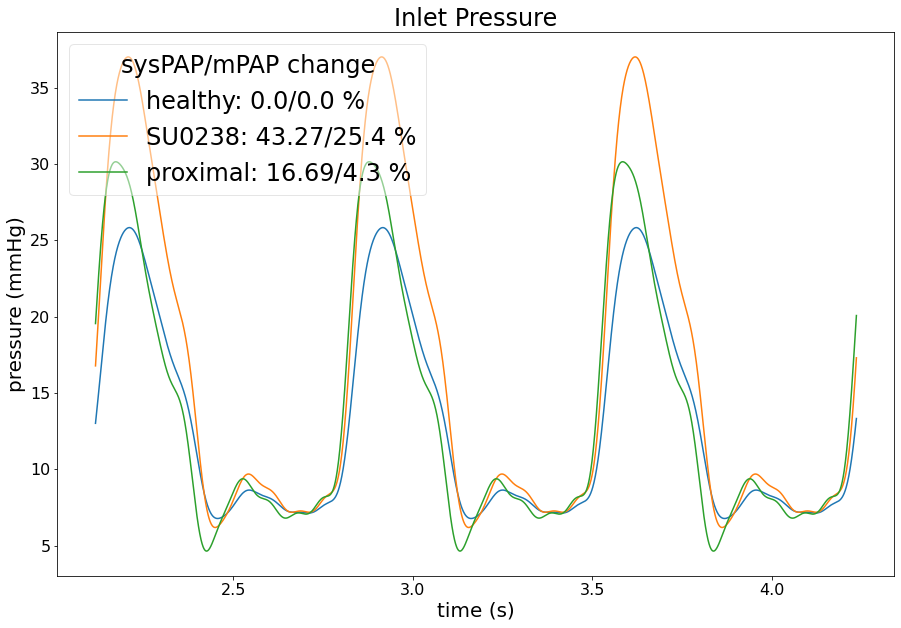

In [9]:
solver = Solver0D()
root =  '../data/healthy/0080_0001/base_solver_files'
solver.read_solver_file(get_solver_path(root))

results = {}
sten_rat = {}
results['healthy'] = SolverResults.load_from_csv(get_branch_results_file(get_solver_path(root), cpp= True))
vals = ['SU0238', 'proximal']
for name in vals:
    new_root = root + f'/artificial_stenosis/{name}'
    solver_file = get_solver_path(new_root)
    result_file = get_branch_results_file(solver_file, cpp= True)
    results[name] = SolverResults.load_from_csv(result_file)
    

combine_solver_results_as(solver, results, '../images/0080_0001_base.png')

healthy
SU0238
proximal


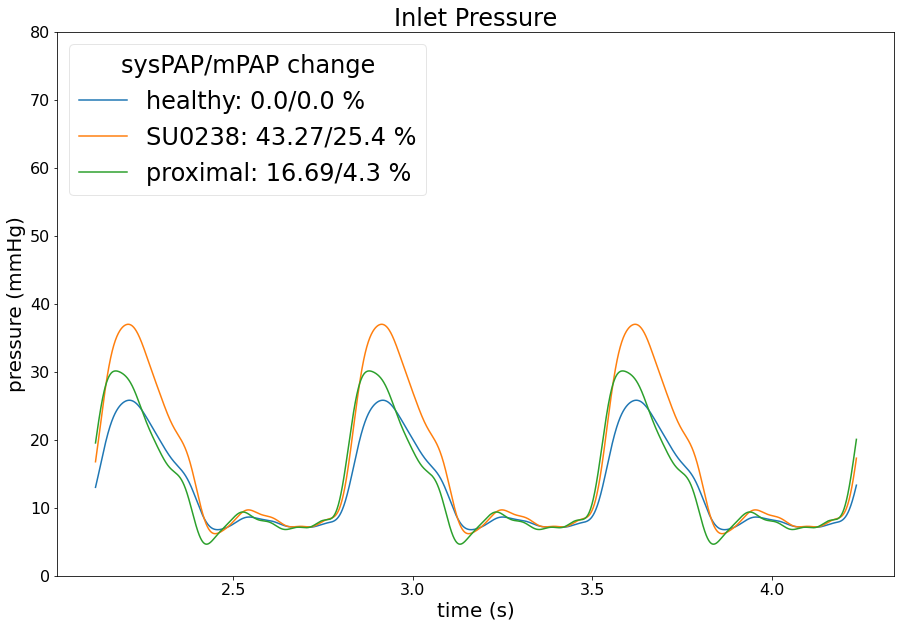

In [17]:
solver = Solver0D()
root =  '../data/healthy/0080_0001/base_solver_files'
solver.read_solver_file(get_solver_path(root))

results = {}
sten_rat = {}
results['healthy'] = SolverResults.load_from_csv(get_branch_results_file(get_solver_path(root), cpp= True))
vals = ['SU0238', 'proximal']
for name in vals:
    new_root = root + f'/artificial_stenosis/{name}'
    solver_file = get_solver_path(new_root)
    result_file = get_branch_results_file(solver_file, cpp= True)
    results[name] = SolverResults.load_from_csv(result_file)
    

combine_solver_results_as(solver, results, '../images/0080_0001_base_comp.png', ylim = (0, 80))

healthy
SU0238
proximal


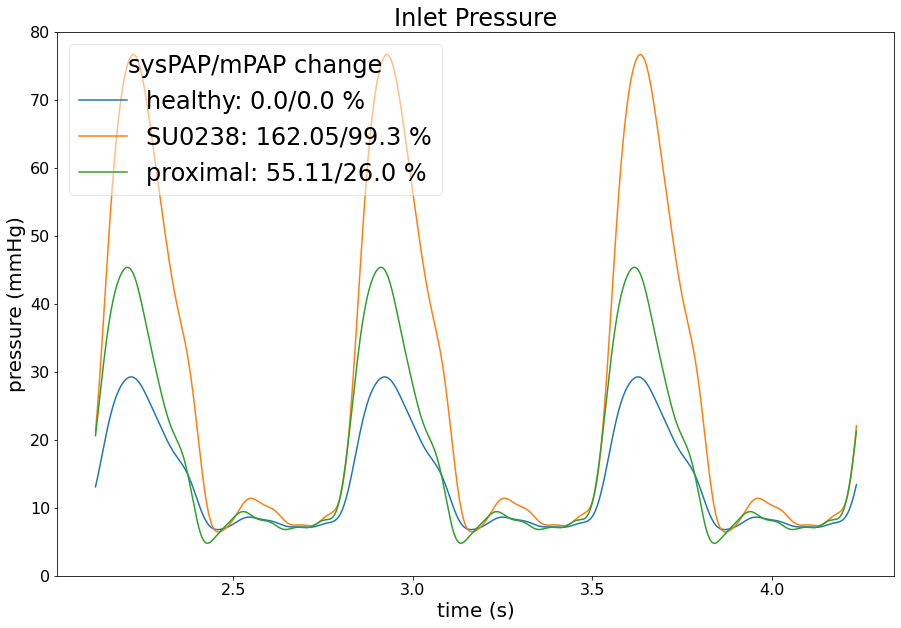

In [18]:
solver = Solver0D()
root =  '../data/healthy/0080_0001/jc_solver_dir_0'
solver.read_solver_file(get_solver_path(root))

results = {}
sten_rat = {}
results['healthy'] = SolverResults.load_from_csv(get_branch_results_file(get_solver_path(root), cpp= True))
vals = ['SU0238', 'proximal']
for name in vals:
    new_root = root + f'/artificial_stenosis/{name}'
    solver_file = get_solver_path(new_root)
    result_file = get_branch_results_file(solver_file, cpp= True)
    results[name] = SolverResults.load_from_csv(result_file)
    

combine_solver_results_as(solver, results, '../images/0080_0001_jc.png', ylim = (0, 80))

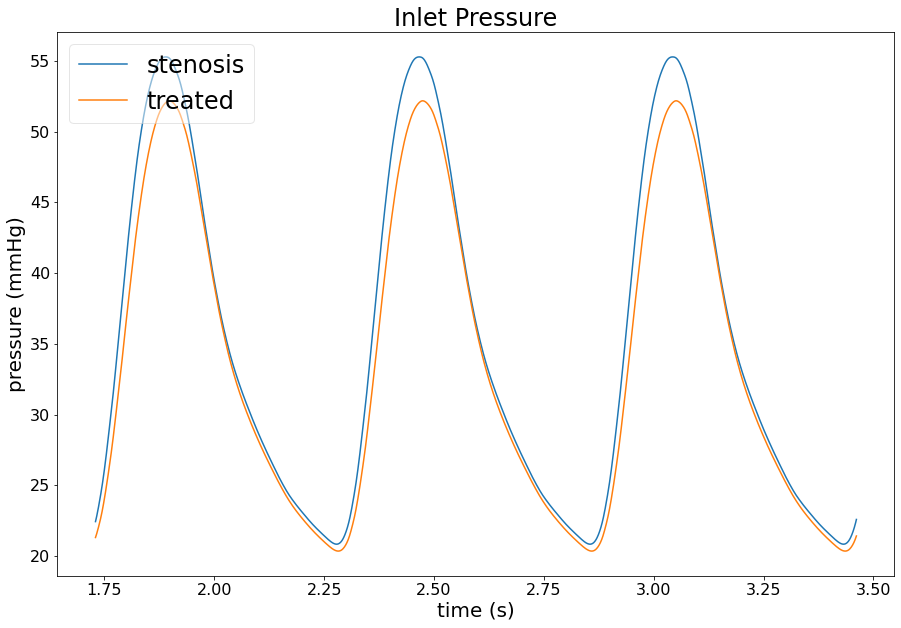

In [12]:
solver = Solver0D()
root =  '../data/stenosis/0118_1000/base_solver_files'
solver.read_solver_file(get_solver_path(root))

results = {}
results['stenosis'] = SolverResults.load_from_csv(get_branch_results_file(get_solver_path(root), cpp= True))

new_root = root + f'/fixed_stenosis/'
solver_file = get_solver_path(new_root)
result_file = get_branch_results_file(solver_file, cpp= True)
results['treated'] = SolverResults.load_from_csv(result_file)

combine_solver_results_sten(solver, results, '../images/0118_1000_base.png')
    

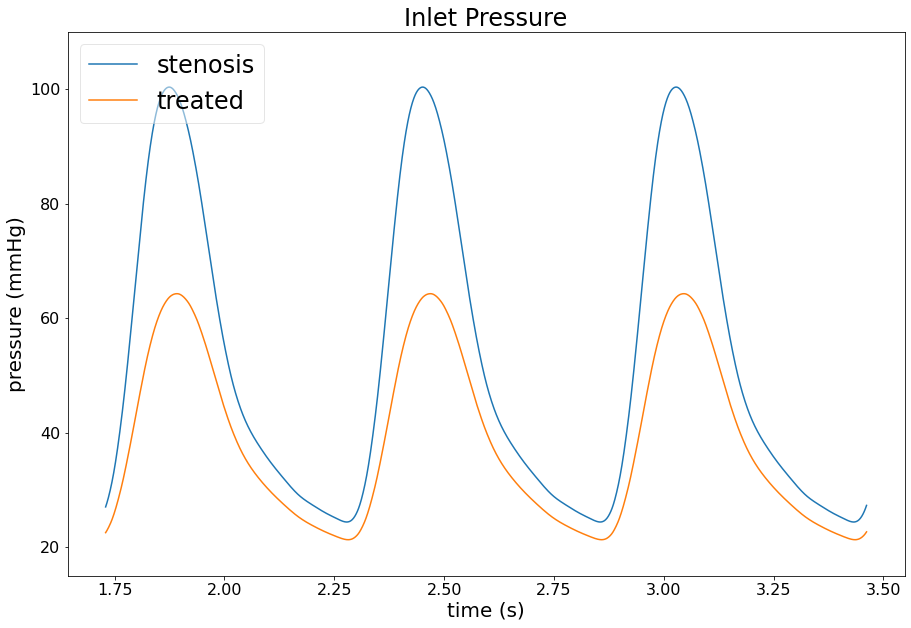

In [13]:
solver = Solver0D()
root =  '../data/stenosis/0118_1000/jc_solver_dir_0'
solver.read_solver_file(get_solver_path(root))

results = {}
results['stenosis'] = SolverResults.load_from_csv(get_branch_results_file(get_solver_path(root), cpp= True))

new_root = root + f'/fixed_stenosis/'
solver_file = get_solver_path(new_root)
result_file = get_branch_results_file(solver_file, cpp= True)
results['treated'] = SolverResults.load_from_csv(result_file)

combine_solver_results_sten(solver, results, '../images/0118_1000_jc0.png', ylim = (15, 110))
    

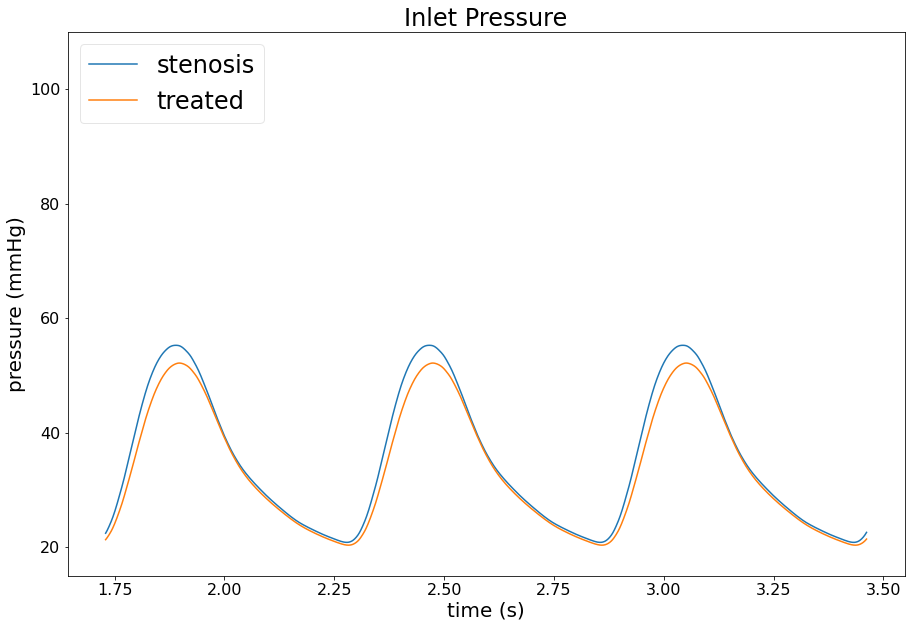

In [14]:
solver = Solver0D()
root =  '../data/stenosis/0118_1000/base_solver_files'
solver.read_solver_file(get_solver_path(root))

results = {}
results['stenosis'] = SolverResults.load_from_csv(get_branch_results_file(get_solver_path(root), cpp= True))

new_root = root + f'/fixed_stenosis/'
solver_file = get_solver_path(new_root)
result_file = get_branch_results_file(solver_file, cpp= True)
results['treated'] = SolverResults.load_from_csv(result_file)

combine_solver_results_sten(solver, results, '../images/0118_1000_base_comp.png',ylim = (15, 110))
    

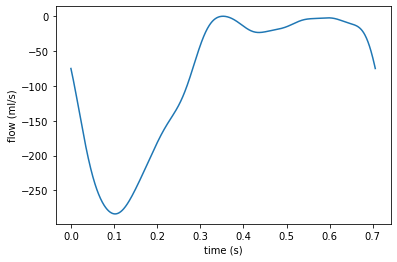

In [7]:
import matplotlib.pyplot as plt

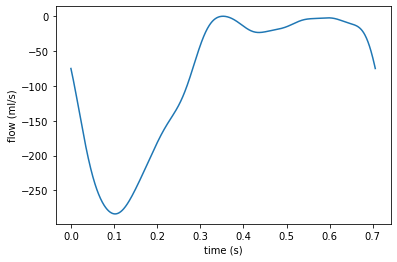

In [28]:
from src.flow import Inflow0D

inflow = Inflow0D.from_file('../data/healthy/0080_0001/base_solver_files/three_d_dir/inflow.flow')
inflow.plot_flow('inflow.png')

In [29]:
from src.centerlines import Centerlines

c = Centerlines()
c.load_centerlines('../data/healthy/0080_0001/base_solver_files/three_d_dir/0080_0001_model_converted.vtp')
arr = c.get_pointdata_arraynames()
x = []
y = []
for name in arr:
    if name.startswith('flow'):
        x.append(float(name.split('_')[-1]))
        y.append(c.get_pointdata(name)[0])

Text(0.5, 1.0, 'Inflow Results 3D')

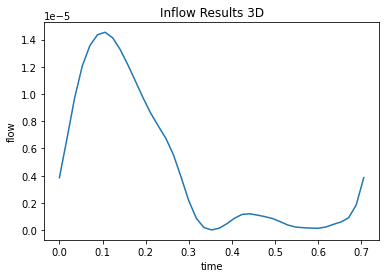

In [30]:
plt.plot(x, y)
plt.xlabel('time')
plt.ylabel('flow')
plt.title('Inflow Results 3D')

Text(0.5, 1.0, '0D Prescribed Inflow')

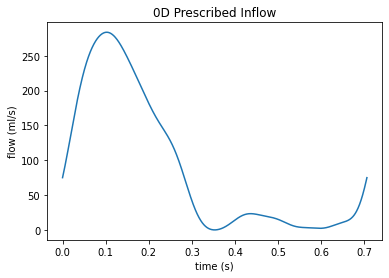

In [31]:
from src.solver_results import SolverResults
rez = SolverResults.load_from_csv('../data/healthy/0080_0001/base_solver_files/0080_0001_model_branch_results.csv')
rezi = Inflow0D.from_file('../data/healthy/0080_0001/base_solver_files/inflow.flow')
rezi.plot_flow('inflow.png')
plt.title('0D Prescribed Inflow')

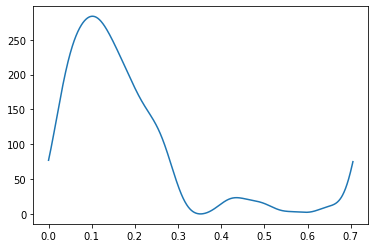

In [32]:
v0 = SolverResults.only_last_cycle(rez.vessel_df('V0'), inflow.tc)
plt.plot(v0['time'].to_numpy(), v0['flow_in'].to_numpy())

In [38]:
from  scipy.interpolate import interp1d

In [ ]:
solver = Solver0D()
root =  '../data/healthy/0080_0001/base_solver_files'
solver.read_solver_file(get_solver_path(root))

results = {}
for i in ['ineffective', 'moderate', 'proximal']:
    new_root = root + f'/artificial_stenosis/{i}'
    solver_file = get_solver_path(new_root)
    result_file = get_branch_results_file(solver_file, cpp= True)
    results[i] = SolverResults.load_from_csv(result_file)


    

In [43]:
f = interp1d(x= inflow.t,y = inflow.Q, kind = 'cubic')

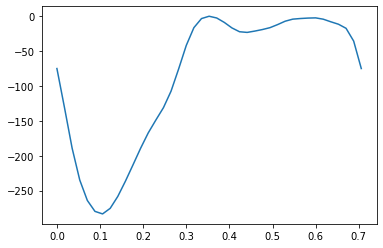

In [45]:
plt.plot(x, f(x))

In [1]:
plt.plot(range(len(y), y))

NameError: name 'plt' is not defined

In [48]:
new_y = f(x)

In [49]:
s = np.divide(new_y, y)

In [52]:
s

array([-19494172.97696403, -19494794.29291886, -19496391.04031248,
       -19496603.63248626, -19498094.83199859, -19496107.41718398,
       -19496849.87526834, -19496696.02527655, -19493978.09946566,
       -19494573.46177508, -19493788.34303462, -19492444.77676756,
       -19491465.94971436, -19493047.11872964, -19497927.13069047,
       -19504364.33016705, -19495861.65235111, -19468167.26421918,
       -19404583.10434116, -19258708.55355159, -17470546.01218364,
       -19356054.06781457, -19462381.33326981, -19504079.55188077,
       -19501359.14238748, -19502293.90168932, -19489827.50698186,
       -19491926.15022623, -19503163.22366991, -19497176.36584668,
       -19465589.13117551, -19443481.39432063, -19493838.2644953 ,
       -19486140.45277994, -19417787.37431842, -19458427.11698016,
       -19494224.9099333 , -19484138.48546132, -19452802.50936481,
       -19452664.17873522, -19494172.97421207])

In [51]:
s / s.mean()

array([1.00349085, 1.00352284, 1.00360503, 1.00361598, 1.00369274,
       1.00359043, 1.00362865, 1.00362073, 1.00348082, 1.00351147,
       1.00347105, 1.00340189, 1.00335151, 1.0034329 , 1.0036841 ,
       1.00401547, 1.00357778, 1.00215217, 0.99887909, 0.99136998,
       0.89932172, 0.99638098, 1.00185433, 1.00400081, 1.00386077,
       1.00390889, 1.00326717, 1.0033752 , 1.00395364, 1.00364546,
       1.00201946, 1.00088143, 1.00347362, 1.00307737, 0.99955879,
       1.00165078, 1.00349353, 1.00297431, 1.00136125, 1.00135413,
       1.00349085])